# Fit of `B0_M` of the recontructed $B^0 \to D^*K \pi^+\pi^-$ decay
- **Model**: sum of 2 crystall balls (with right powertail)
- **Data** : `RapidSim` simulated of $B^0 \to D^*K \pi^+\pi^-$ with $K$ misidentified as a $\pi$ of same charge

## Libraries

In [1]:
import zfit

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data
import plot.histogram as h
from plot.fit import plot_hist_fit_particle
from fit import launch_fit, save_param

Welcome to JupyROOT 6.22/02


In [2]:
name_data = 'data_KPiPi'

## Explore the data

In [ ]:
df = load_data(years,magnets,type_data = 'data_KPiPi')

/afs/cern.ch/user/d/dhill/public/forAnthony/Bd2DstKPiPi.root


In [ ]:
df["Delta_M"] = df["Dst_M"] - df["D0_M"]

In [ ]:
h.plot_hist({name_data: df},'Delta_M', '$\Delta M$', 'MeV/$c^2$', n_bins = 100, name_folder = name_data, colors='black')

Haha, no need to cut on $\Delta M$ 

## Retrieve data

In [3]:
df = load_data(years,magnets,type_data = 'data_KPiPi',vars = ['B0_M_Tau_Pi12pip'])

/afs/cern.ch/user/d/dhill/public/forAnthony/Bd2DstKPiPi.root


In [4]:
name_data = 'data_KPiPi'
var = 'B0_M_Tau_Pi12pip'
low = 4.3
high = 5.35

## Plot 1D histograms

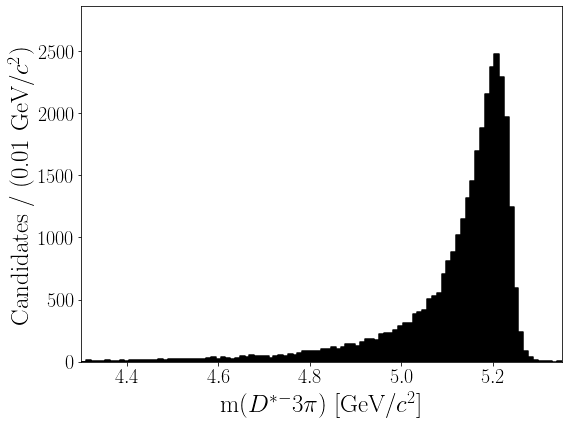

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi/B0_M_Tau_Pi12pip_data_KPiPi.pdf


In [5]:
h.plot_hist_particle({name_data:df}, var, n_bins = 100, name_folder = name_data, colors='black', mode_hist=True,
                      low=low, high=high)

## Two Crystall ball Fit

In [5]:
obs = zfit.Space("x", limits=(low, high))

In [6]:
# name        value    minuit_hesse         minuit_minos    at limit
# --------  -------  --------------  -------------------  ----------
# fraction   0.5489     +/-   0.028  -  0.028   +  0.036       False
# alphaL     0.2606     +/-   0.036  -   0.04   +  0.036       False
# muL          5.16     +/-  0.0024  - 0.0026   + 0.0024       False
# nL          3.987     +/-    0.28  -   0.26   +   0.28       False
# sigmaL    0.02192     +/-  0.0025  - 0.0027   + 0.0025       False
# alphaR      1.828     +/-    0.21  -    0.2   +   0.17       False
# muR         5.211     +/-  0.0012  - 0.0012   + 0.0015       False
# nR          1.999     +/-    0.75  -   0.58   +    2.1       False
# sigmaR    0.02389     +/- 0.00048  -0.00053   + 0.0005       False

muL = zfit.Parameter("muL", 5.16, 5.15, 5.23)
muR = zfit.Parameter("muR", 5.2, 5.15, 5.23)

sigmaL = zfit.Parameter("sigmaL", 0.02, 0.01, 0.1)
sigmaR = zfit.Parameter("sigmaR", 0.02, 0.01, 0.1)

alphaL = zfit.Parameter("alphaL", 0.26, 0.01, 2.)
alphaR = zfit.Parameter("alphaR", 1.83, 0.01, 2.)

nL = zfit.Parameter("nL", 4., 0.1, 10.)
#nR = zfit.Parameter("nR", 100., 0.1, 1000.)
nR = zfit.Parameter("nR", 2., 0.1, 100.)

frac = zfit.Parameter("fraction", 0.55, 0, 3.) # fraction between L and R

In [7]:
name_params = {
    'muL':'$\\mu_L$',
    'sigmaL':'$\\sigma_L$',
    'muR':'$\\mu_R$',
    'sigmaR':'$\\sigma_R$',
    'alphaL':'$\\alpha_L$',
    'alphaR':'$\\alpha_R$',
    'nL':'$n_L$',
    'nR':'$n_R$',
}

In [8]:
# doubleCB = zfit.pdf.DoubleCB(mu, sigma, alphaL, alphaR, nL, nR, obs=obs)

crystalBallL = zfit.pdf.CrystalBall(muL, sigmaL, alphaL, nL, obs=obs)
crystalBallR = zfit.pdf.CrystalBall(muR, sigmaR, alphaR, nR, obs=obs)
# gaussianR = zfit.pdf.Gauss(muR, sigmaR, obs=obs)

model = zfit.pdf.SumPDF([crystalBallL, crystalBallR], fracs=frac) # crystalBallR is multiplied by fracs

data = zfit.Data.from_pandas(df[var],obs=obs)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:443: UserWarning: The function <function Space.limits at 0x7fdd064f33b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4.3]]), array([[5.35]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7fdd064f87a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4.3]]), array([[5.35]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to DejaVu Sa

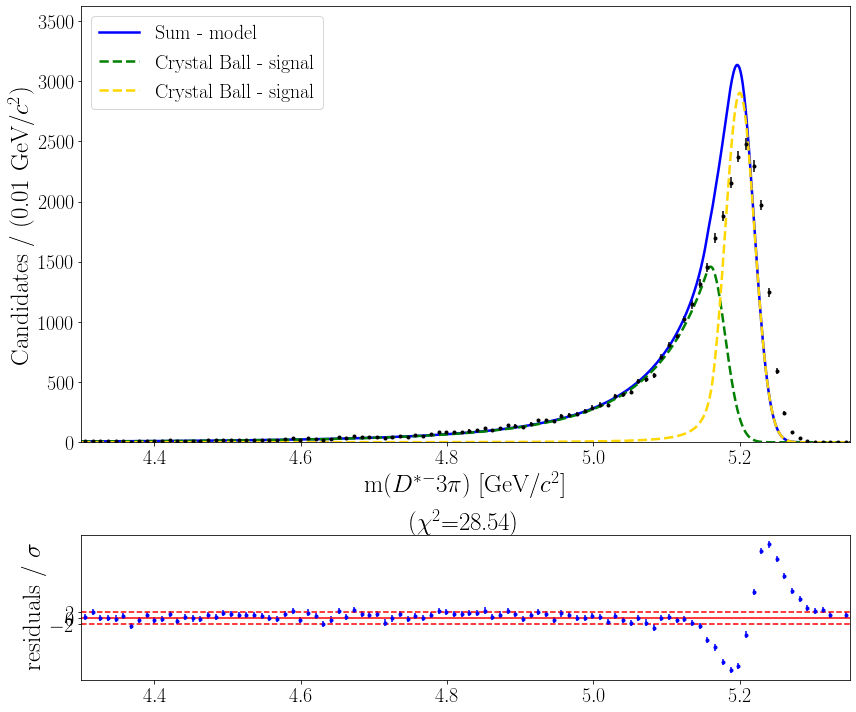

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi/B0_M_Tau_Pi12pip_data_KPiPi_fit.pdf


In [9]:
plot_hist_fit_particle(df, var, models = [model, crystalBallL, crystalBallR], obs=obs, n_bins = 100,mode_hist = False,
                       name_folder = name_data, type_models= 'mss', loc_res='lower left',
                       name_data = name_data, show_chi2=True,
                       frac = float(frac))   

In [11]:
result, params = launch_fit(model, data) # perform 2 fits so that the last one converges

------------------------------------------------------------------
| FCN = -3.316e+04              |     Ncalls=140 (140 total)     |
| EDM = 0.000234 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name        value    minuit_hesse         minuit_minos    at limit
--------  -------  --------------  -------------------  ----------
fraction   0.5481     +/-   0.029  -  0.029   +  0.029       F

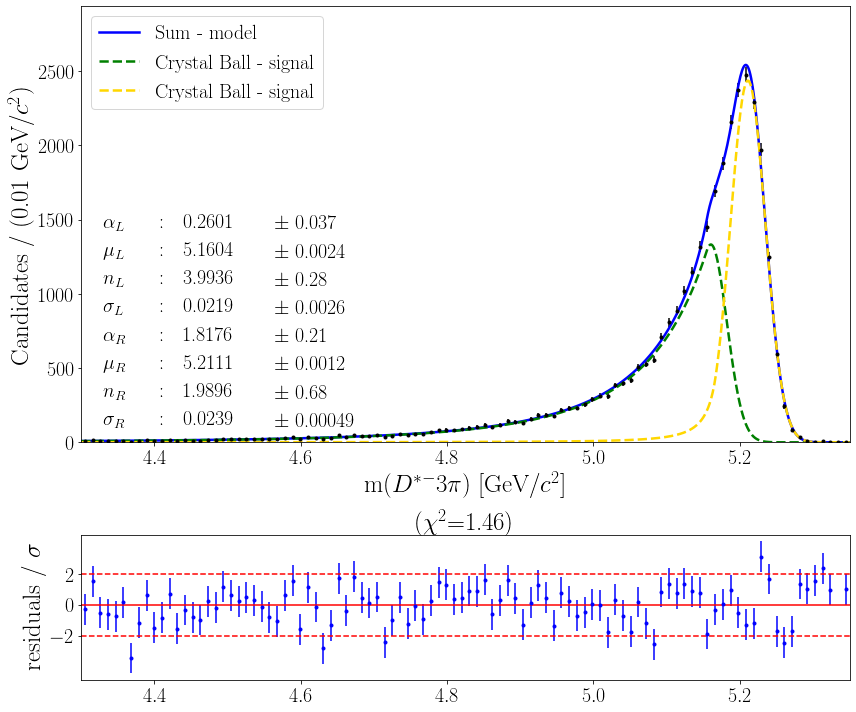

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi/B0_M_Tau_Pi12pip_data_KPiPi_chi2_fit.pdf


In [21]:
plot_hist_fit_particle(df, var, models = [model, crystalBallL, crystalBallR], obs=obs, n_bins = 100,mode_hist = False,
                       name_folder = name_data, type_models= 'mss', loc_res='lower left',
                       name_data = name_data+'_chi2',  params=params, name_params=name_params,
                       frac = float(frac), show_chi2=True)    

In [18]:
save_params(params, name_data, True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/data_KPiPi_params.json
